# By request

Here are some solutions to questions that you have asked me. These were questions that I didn't immediately know the answer to, but found a solution to after a bit of trial and error. I'll share my solutions here, in case you are interested, and also so I can find them again, next time somebody asks (or I want to do something like this myself). The data are the Sternberg 2021 data from the course.

In [1]:
# import modules and data

import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

sns.set_context("notebook", font_scale=1.5)

file = 'https://raw.githubusercontent.com/ethanweed/ExPsyLing/master/datasets/Sternberg/2021/Sternberg_cleaned.csv'

data = pd.read_csv(file)


## How can I add a correlation coefficient to my plot?

The solution I found after a bit of searching was to first calculate the r-value, then convert it to a string, and put that string inside a text box.


Text(0.8, 0.12, 'r = 0.266')

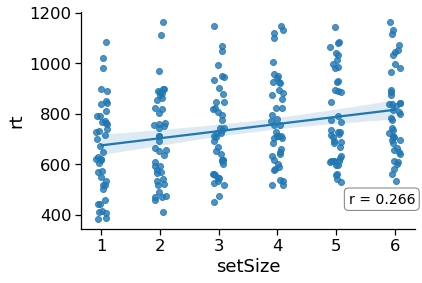

In [2]:

# Add and annotation to the figure with the correlation coefficient (r)

# calculate correlation coefficient and plot on figure with regression line
# 1. correlate the data in column "setSize" with the data in column "rt" -> x.corr(y)
# 2. round the answer to three decimal places -> round(answer, 3)
# 3. convert the answer to a string -> str(answer_from_step_2)
# 4. "add" 'r = ' to result of 3
# Here is a single line that does it all at once:

r = 'r = ' + str(round(data['setSize'].corr(data['rt']), 3))

# make a plot with jittered data (to avoid overlap)
ax = sns.regplot(x = 'setSize', y = 'rt', x_jitter =.1, data = data)

# remove top and bottom edges to make it prettier
sns.despine(top = True, right = True)

# Design a box to put the correlation coefficient annotation in
# boxstyle = shape of the box
# facecolor = background color for the box
# alpha = how transparent should the box background be

label_style = dict(boxstyle='round', facecolor='white', alpha=0.5)

# x and y coordinates for where the box should be placed
x = .8
y = 0.12

# place the annotation box on the graph at x and y coordinates, 
# with font size 14
# displaying the text in "r" and the
# stylistic choices from label_style
# transform=ax.transAxes: https://matplotlib.org/stable/tutorials/advanced/transforms_tutorial.html

ax.text(x, y, r, 
        fontsize=14,
        transform=ax.transAxes, 
        bbox = label_style)

## My data are all positive numbers, but what if I wanted to add negative values to the x or y axis anyway?

I couldn't find any way to force `matplotlib` to extend the axes past 0, when no data points were less than zero. So my solution to this problem was to create some fake data that were less than zero, and add these to dataframe. To make sure the data were symmetrical, I found the largest _real_ data point in the columns of data for the x and y axes, and then multiplied these by -1 to make equally "large" negative numbers. Of course, we don't want to actually _see_ the data, becuase they are just there to force the axes below zero, so when I plotted these fake data, I hid the regression line and the data points.

As a final touch, I added dotted horizontal and vertical lines that pass through the origin, to make a pretty four-quadrant Cartesian coordinate system.

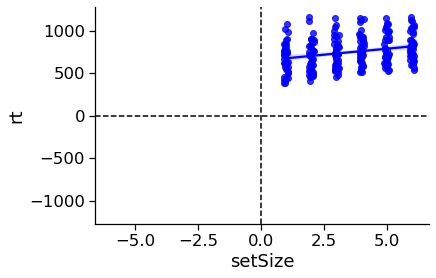

In [3]:
import seaborn as sns
from matplotlib import pyplot as plt

# We will be adding fake data to extend the axes, so
# first I will make a new dataframe so I don't mess with the "real" data.
# This isn't really needed, but it makes me feel better.
df = data

# Find the maximum value for y and x and put a minus sign in front of them
lowest_y = max(df['rt'])*-1
lowest_x = max(df['setSize'])*-1

# Make new columns of data by making lists that are as long as the columns of data in the dataframe,
# and fill these with fake data
df['yextra'] = [lowest_y]*df.shape[0]
df['xextra'] = [lowest_x]*df.shape[0]

# Plot the fake data first and then the real data last. This is because the axis labels come from
# the last data plotted
ax = sns.regplot(x = 'setSize', y = 'yextra', fit_reg = False, marker = "", data = df)
ax = sns.regplot(x = 'xextra', y = 'xextra', fit_reg = False, marker = "", data = df)
ax = sns.regplot(x = 'setSize', y = 'rt', x_jitter = 0.1, color = 'blue', data = df)

# Add the horizontal and vertical lines and make them dashed
ax. axhline(y=0, color='black', linestyle='--')
ax. axvline(x=0, color='black', linestyle='--')
sns.despine(top = True, right = True)